In [1]:
import pickle
from helper_fxns import convert_param_vec_dict_to_param_dict, gelman_rubin_trace_dict, print_convergence_summary, sample_plots, create_trace_matrix, plot_histograms
from earm.lopez_embedded import model
%matplotlib inline
import os
import numpy as np

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
os.chdir('/data/lola/shockle/data_for_paper_attempt2/')

In [3]:
trace_a = pickle.load(open('earm_dreamzs_16chain_a_psostart.p'))
trace_b = pickle.load(open('earm_dreamzs_16chain_b_psostart.p'))
trace_c = pickle.load(open('earm_dreamzs_16chain_c_psostart.p'))
trace_d = pickle.load(open('earm_dreamzs_16chain_d_psostart.p'))

In [4]:
trace_a_error = {}
trace_b_error = {}
trace_c_error = {}
trace_d_error = {}
for key in ['momp', 'icrp', 'ecrp']:
    trace_a_error[key] = trace_a[key]
    trace_b_error[key] = trace_b[key]
    trace_c_error[key] = trace_c[key]
    trace_d_error[key] = trace_d[key]

In [5]:
for key in ['momp', 'icrp', 'ecrp']:
    del trace_a[key]
    del trace_b[key]
    del trace_c[key]
    del trace_d[key]

In [6]:
param_trace_a = convert_param_vec_dict_to_param_dict(trace_a, model.parameters_rules())
param_trace_b = convert_param_vec_dict_to_param_dict(trace_b, model.parameters_rules())
param_trace_c = convert_param_vec_dict_to_param_dict(trace_c, model.parameters_rules())
param_trace_d = convert_param_vec_dict_to_param_dict(trace_d, model.parameters_rules())

In [7]:
os.chdir('/home/shockle/moo_and_mcmc/emcee/')

In [8]:
from earm_uniform_emcee import log_post

In [9]:
for trace in [trace_a, trace_b, trace_c, trace_d]:
    for chain in range(len(trace_a['params'])):
        log_post(trace['params'][chain][-1])

prior:  -282.479411206  like:  -825.844829009  post:  -1108.32424021
prior:  -282.479411206  like:  -826.465817645  post:  -1108.94522885
prior:  -282.479411206  like:  -821.723348621  post:  -1104.20275983
prior:  -282.479411206  like:  -826.665199747  post:  -1109.14461095
prior:  -282.479411206  like:  -820.912909509  post:  -1103.39232072
prior:  -282.479411206  like:  -834.926170336  post:  -1117.40558154
prior:  -282.479411206  like:  -820.517954739  post:  -1102.99736595
prior:  -282.479411206  like:  -821.200162954  post:  -1103.67957416
prior:  -282.479411206  like:  -834.306059721  post:  -1116.78547093
prior:  -282.479411206  like:  -828.267663036  post:  -1110.74707424
prior:  -282.479411206  like:  -827.537405032  post:  -1110.01681624
prior:  -282.479411206  like:  -866.611513658  post:  -1149.09092486
prior:  -282.479411206  like:  -823.232738408  post:  -1105.71214961
prior:  -282.479411206  like:  -836.656618044  post:  -1119.13602925
prior:  -282.479411206  like:  -81

In [10]:
print_convergence_summary(param_trace_a)

Number of parameters with GR below 1.2:  98  of  105  parameters.
Percent of parameters with GR below 1.2:  93.3333333333
Number of parameters with GR below 1.1:  81  of  105  parameters.
Percent of parameters with GR below 1.1:  77.1428571429


[98, 93.33333333333333, 81, 77.14285714285715]

In [11]:
print_convergence_summary(param_trace_b)

Number of parameters with GR below 1.2:  86  of  105  parameters.
Percent of parameters with GR below 1.2:  81.9047619048
Number of parameters with GR below 1.1:  70  of  105  parameters.
Percent of parameters with GR below 1.1:  66.6666666667


[86, 81.9047619047619, 70, 66.66666666666666]

In [12]:
print_convergence_summary(param_trace_c)

Number of parameters with GR below 1.2:  102  of  105  parameters.
Percent of parameters with GR below 1.2:  97.1428571429
Number of parameters with GR below 1.1:  88  of  105  parameters.
Percent of parameters with GR below 1.1:  83.8095238095


[102, 97.14285714285714, 88, 83.80952380952381]

In [13]:
print_convergence_summary(param_trace_d)

Number of parameters with GR below 1.2:  97  of  105  parameters.
Percent of parameters with GR below 1.2:  92.380952381
Number of parameters with GR below 1.1:  64  of  105  parameters.
Percent of parameters with GR below 1.1:  60.9523809524


[97, 92.38095238095238, 64, 60.952380952380956]

60000
16
60000


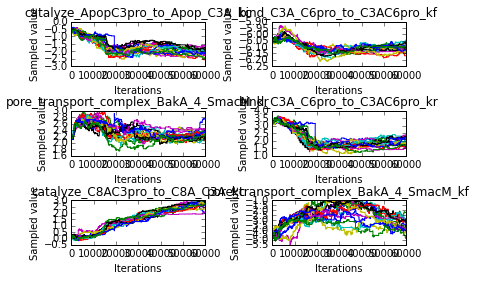

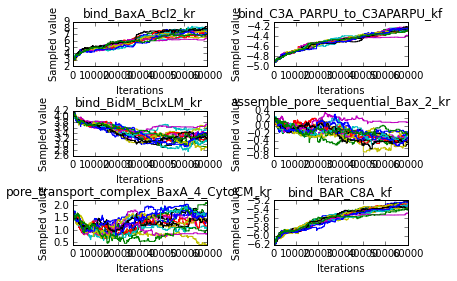

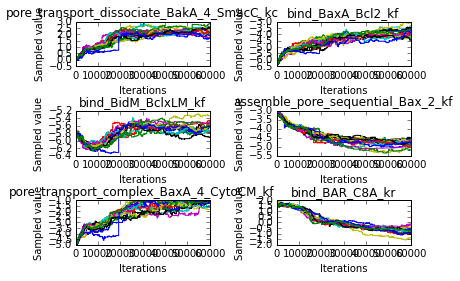

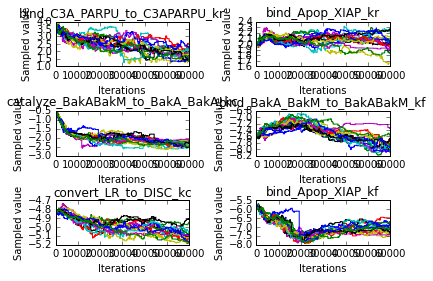

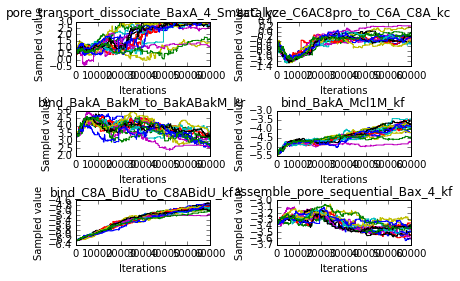

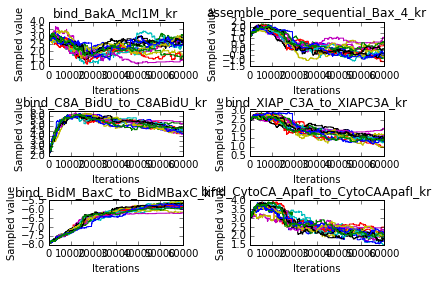

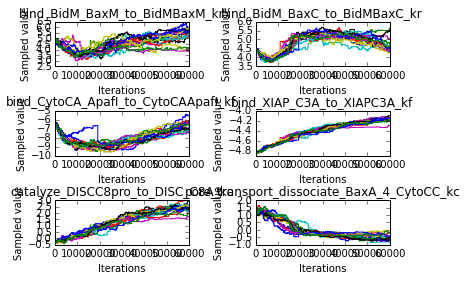

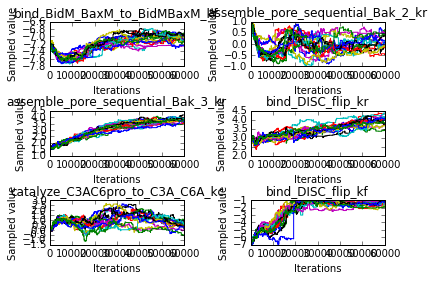

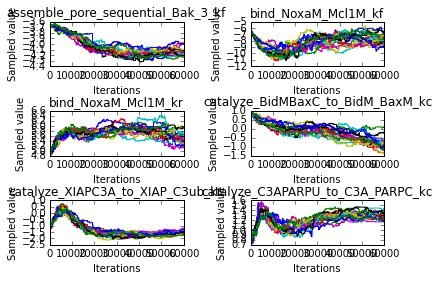

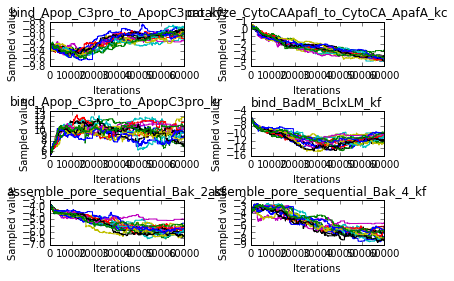

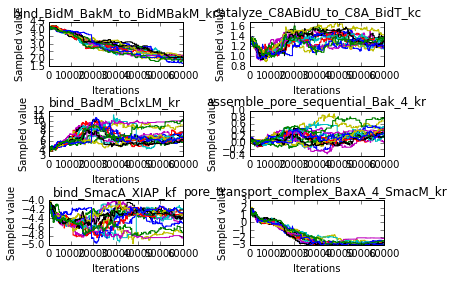

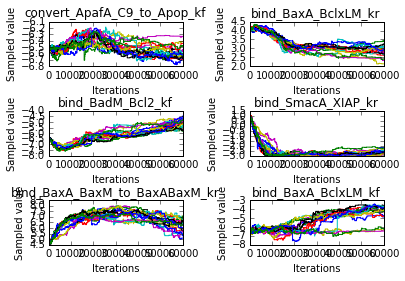

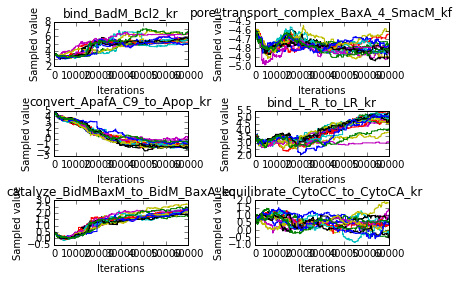

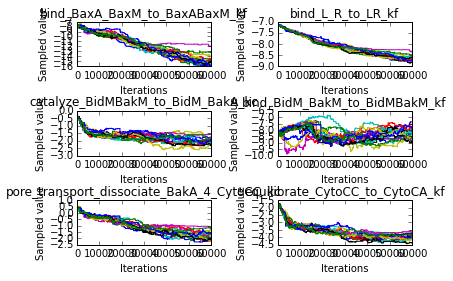

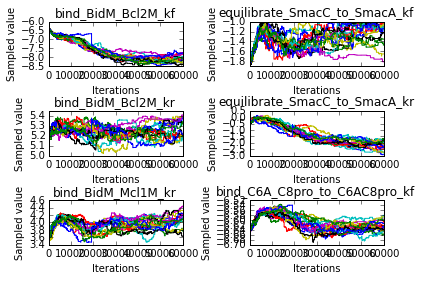

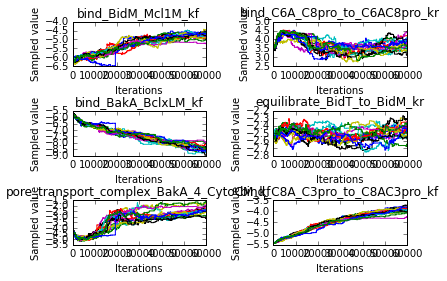

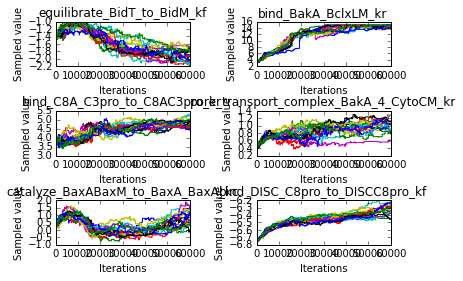

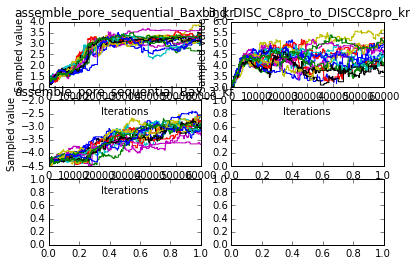

In [14]:
sample_plots(param_trace_a)

In [15]:
trace_arr_a = create_trace_matrix(param_trace_a, burnin=50000)
trace_arr_b = create_trace_matrix(param_trace_b, burnin=50000)
trace_arr_c = create_trace_matrix(param_trace_c, burnin=50000)
trace_arr_d = create_trace_matrix(param_trace_d, burnin=50000)

In [18]:
np.save('earm_dreamzs_16chain_psostart_a_tracearr.npy', trace_arr_a)
np.save('earm_dreamzs_16chain_psostart_b_tracearr.npy', trace_arr_b)
np.save('earm_dreamzs_16chain_psostart_c_tracearr.npy', trace_arr_c)
np.save('earm_dreamzs_16chain_psostart_d_tracearr.npy', trace_arr_d)

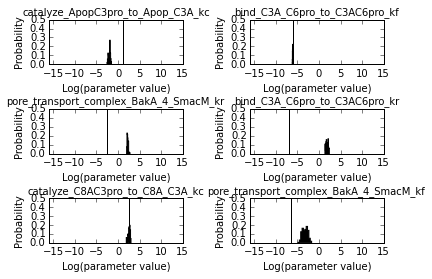

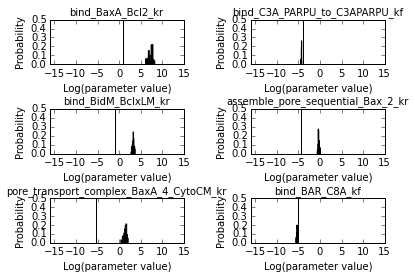

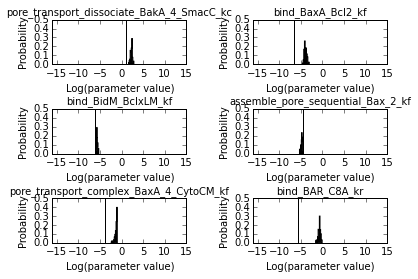

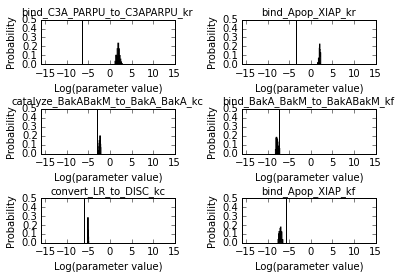

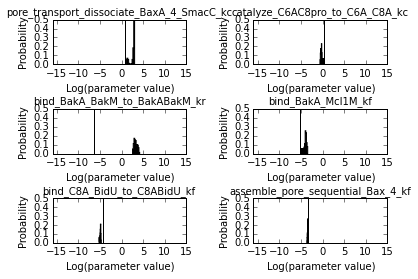

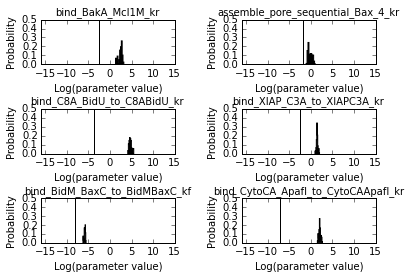

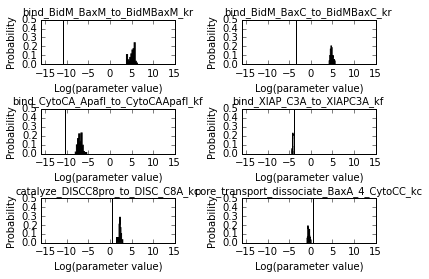

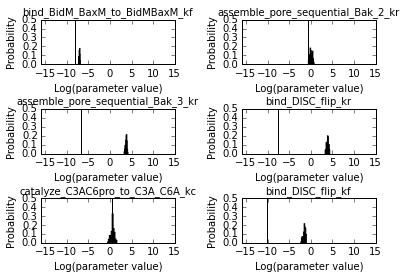

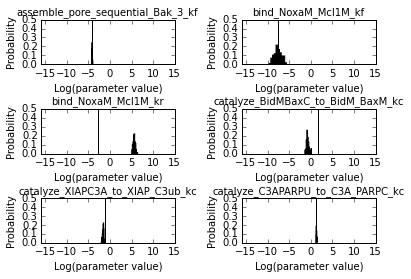

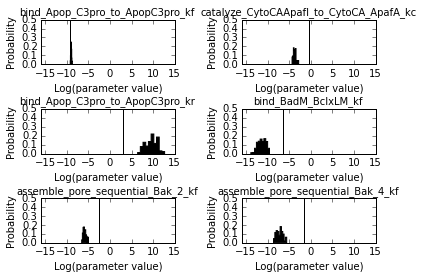

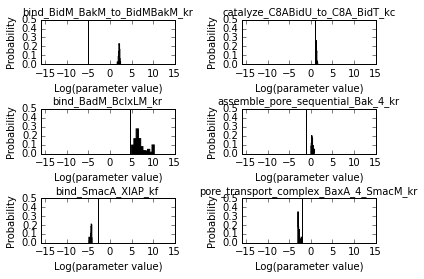

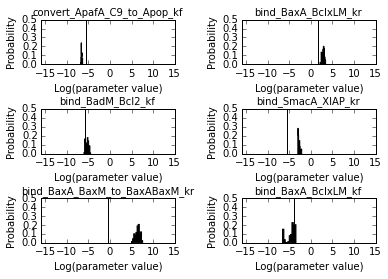

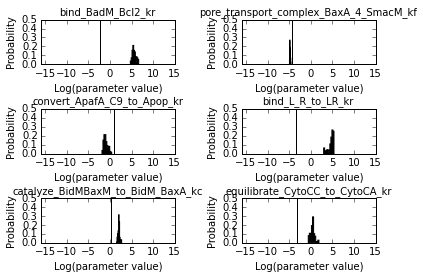

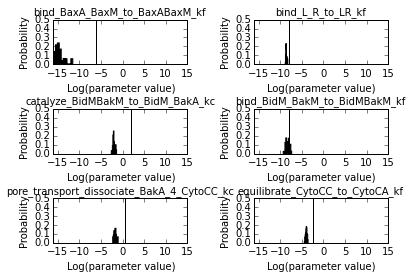

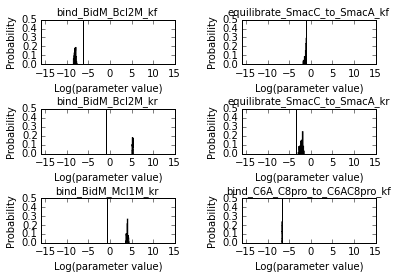

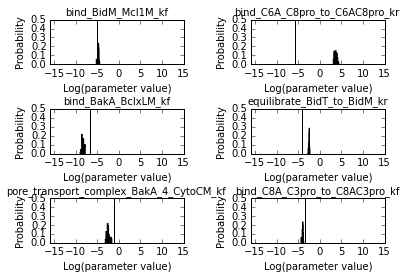

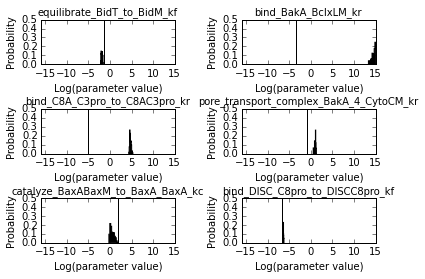

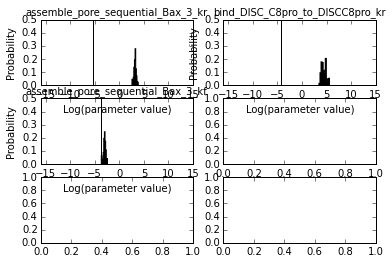

In [17]:
plot_histograms(param_trace_a, trace_arr_a, plot_original_vals=True, model=model, title_fontsize=10)